In [2]:
%reload_ext autoreload
%autoreload 2

from usa.data.load import test

from usa.analysis.fmbv import fmbv_v0 as fmbv
from usa.analysis.fmbv_v2 import fmbv_v2 as fmbv2

import numpy as np
import matplotlib.pyplot as plt
import copy

In [3]:
us = test()
pd_array = us.pd_array

In [4]:
# getting data of the histogram 
count, bins_count = np.histogram(pd_array, bins=255) 
  
# finding the PDF of the histogram using count values 
pdf = count / sum(count) 
  
# using numpy np.cumsum to calculate the CDF 
# We can also find using the PDF values by looping and adding 
cdf = np.cumsum(pdf) 

In [5]:
"""
    quantile interpolation
"""
q = .0


def interp_del(y, ys : list):
    assert len(ys) == 2
    return (y - ys[0])/(ys[1] - ys[0])

def get_std(q):
    assert q >= 0 and q < 1

    i_ = 0
    for i in range(len(cdf)-1):
        if (cdf[i] <= q) and (cdf[i+1] > q):
            i_ = i
            break

    i_true = i_ + interp_del(q, [cdf[i], cdf[i+1]])

    return i_true


In [6]:
std = get_std(q)

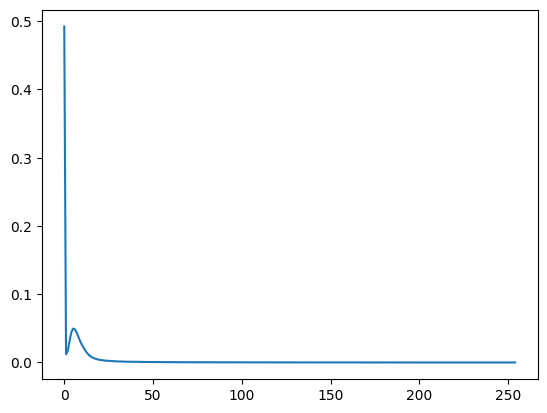

In [7]:
plt.plot(pdf)

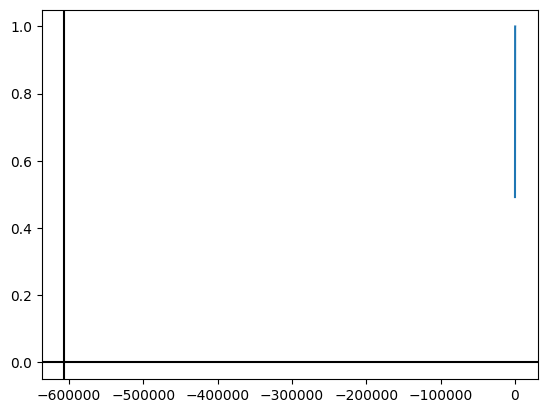

In [8]:
plt.plot(cdf)
plt.axhline(q, c='k')
plt.axvline(std, c='k')

In [9]:
# f2.cdf

NameError: name 'f2' is not defined

122.96359999999461


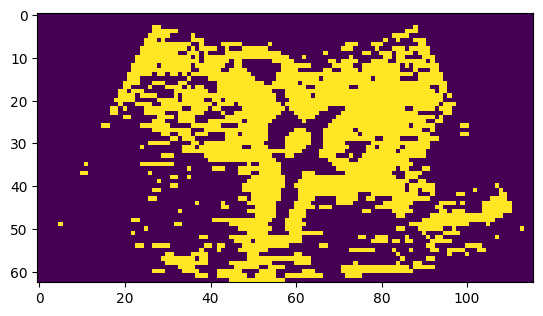

In [30]:
q_min, q_max = 0.8, 0.995

std_min, std_max = get_std(q_min), get_std(q_max)
k_ = int(.5*pd_array.shape[1])
mask = (pd_array > std_min) * (pd_array < std_max)
# plt.imshow(pd_array[:,k_,:])
plt.imshow(mask[:,k_,:])

print(std_max)

In [31]:
pd_array_std = copy.copy(pd_array)

# threshold bottom
pd_array_std = pd_array - std_min
mask_min = pd_array_std < 0 
pd_array_std[mask_min] = 0

# normalise
pd_array_std = pd_array_std / (std_max - std_min)
# # clip above std_max
mask_max = pd_array_std > 1
pd_array_std[mask_max] = 1

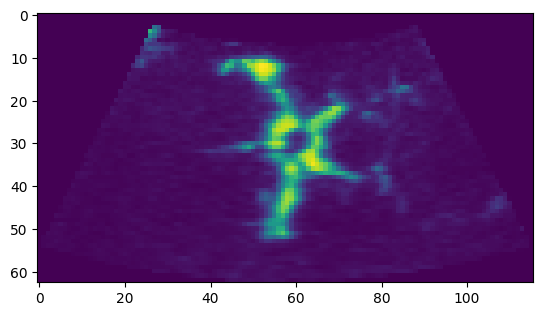

In [32]:
plt.imshow(pd_array[:,k_,:])

In [33]:
# print(f2.std_min)
np.min(pd_array_std)

0.0

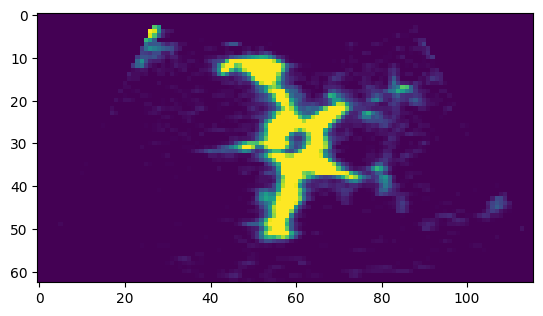

In [34]:
plt.imshow(pd_array_std[:,k_,:])
# plt.colorbar()

In [35]:
np.mean(pd_array_std[us.seg_array == us.vol_id])

0.1521688212683083

In [36]:
f2 = fmbv2(us)
f2.fmbv([q_min, q_max])
print(f2.global_fmbv)
print(f2.std_min)

0.1521688212683083
8.7373391016397


In [37]:
f = fmbv(us)
f.global_method()
print(f.global_fmbv_2)

22.943732321919374
